# Spatial Weights

Spatial weights are mathematical structures used to represent spatial relationships. They characterize the relationship of each observation to every other observation using some concept of proximity or closeness that depends on the weight type.

They can be build in PySAL from shapefiles, as well as some types of files. 

In [1]:
import pysal as ps
import numpy as np

There are functions to construct weights directly from a file path. 

In [2]:
shp_path = "../data/texas.shp"

## Weight Types

### Contiguity: 
#### Queen Weights

A commonly-used type of weight is a queen contigutiy weight, which reflects adjacency relationships as a binary indicator variable denoting whether or not a polygon shares an edge or a verted each another polygon. These weights are symmetric, in that when polygon $A$ neighbors polygon $B$, both $w_{AB} = 1$ and $w_{BA} = 1$.

To construct queen weights from a shapefile, use the `queen_from_shapefile` function:

In [3]:
qW = ps.queen_from_shapefile(shp_path)
dataframe = ps.pdio.read_files(shp_path)

In [4]:
qW

All weights objects have a few traits that you can use to work with the weights object, as well as to get information about the weights object. 

To get the neighbors & weights around an observation, use the observation's index on the weights object, like a dictionary:

In [5]:
qW[4] #neighbors & weights of the 5th observation

{0: 1.0, 3: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}

By default, the weights and the pandas dataframe will use the same index. So, we can view the observation and its neighbors in the dataframe by putting the observation's index and its neighbors' indexes together in one list:

In [6]:
self_and_neighbors = [4]
self_and_neighbors.extend(qW.neighbors[4])
print(self_and_neighbors)

[4, 0, 3, 5, 6, 7]


and grabbing those elements from the dataframe:

In [7]:
dataframe.loc[self_and_neighbors]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.000000,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.000000,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
5,Roberts,Texas,48,393,48393,48,393,48393,1,0.000000,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
6,Hemphill,Texas,48,211,48211,48,211,48211,1,0.000000,...,0.188172,0.286707,0.385605,0.352996,0.346318,6.300115,6.9,6.451613,6.330366,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
7,Hutchinson,Texas,48,233,48233,48,233,48233,1,1.936915,...,2.635369,0.199287,0.322579,0.323864,0.370207,5.387316,5.1,6.222679,8.484271,<pysal.cg.shapes.Polygon object at 0x7f83e0035...


A full, dense matrix describing all of the pairwise relationships is constructed using the `.full` method, or when `pysal.full` is called on a weights object:

In [8]:
Wmatrix, ids = qW.full()
#Wmatrix, ids = ps.full(qW)

In [9]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

Note that this matrix is binary, in that its elements are either zero or one, since an observation is either a neighbor or it is not a neighbor. 

However, many common use cases of spatial weights require that the matrix is row-standardized. This is done simply in PySAL using the `.transform` attribute

In [10]:
qW.transform = 'r'

Now, if we build a new full matrix, its rows should sum to one:

In [11]:
Wmatrix, ids = qW.full()

In [12]:
Wmatrix.sum(axis=1) #numpy axes are 0:column, 1:row, 2:facet, into higher dimensions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

Since weight matrices are typically very sparse, there is also a sparse weights matrix constructor:

In [13]:
qW.sparse

<254x254 sparse matrix of type '<type 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

By default, PySAL assigns each observation an index according to the order in which the observation was read in. This means that, by default, all of the observations in the weights object are indexed by table order. If you have an alternative ID variable, you can pass that into the weights constructor. 

For example, the `texas.shp` dataset has a possible alternative ID Variable, a `FIPS` code.

In [14]:
dataframe.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x7f83e0035...


The observation we were discussing above is in the fifth row: Pend Oreille county, Washington. Note that its FIPS code is 53051.

Then, instead of indexing the weights and the dataframe just based on read-order, use the `FIPS` code as an index:

In [15]:
qW = ps.queen_from_shapefile(shp_path, idVariable='FIPS')

In [16]:
ps.knnW_from_shapefile??

Now, Pend Oreille county has a different index:

In [17]:
qW[4] #fails, since no FIPS is 4. 

KeyError: 4

Note that a `KeyError` in Python usually means that some index, here `4`, was not found in the collection being searched, the IDs in the queen weights object. This makes sense, since we explicitly passed an `idVariable` argument, and nothing has a `FIPS` code of 4.

Instead, if we use the observation's `FIPS` code:

In [18]:
qW['48111']

{u'48205': 1.0, u'48341': 1.0, u'48421': 1.0}

We get what we need.

In addition, we have to now query the dataframe using the `FIPS` code to find our neighbors. But, this is relatively easy to do, since pandas will parse the query by looking into python objects, if told to. 

First, let us store the neighbors of our target county:

In [19]:
self_and_neighbors = ['48111']
self_and_neighbors.extend(qW.neighbors['48111'])

Then, we can use this list in `.query`: 

In [20]:
dataframe.query('FIPS in @self_and_neighbors')

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
8,Hartley,Texas,48,205,48205,48,205,48205,1,0.0,...,0.247661,0.272450,0.397082,0.424883,0.356978,6.164384,2.3,4.411765,3.073967,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
9,Moore,Texas,48,341,48341,48,341,48341,1,0.0,...,0.531766,0.189861,0.336510,0.327273,0.357514,5.195843,4.0,5.148473,8.786952,<pysal.cg.shapes.Polygon object at 0x7f83e0035...


Note that we have to use `@` before the name in order to show that we're referring to a python object and not a column in the dataframe. 

In [21]:
#dataframe.query('FIPS in neighs') will fail because there is no column called 'neighs'

Of course, we could also reindex the dataframe to use the same index as our weights:

In [22]:
fips_frame = dataframe.set_index(dataframe.FIPS)
fips_frame.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
FIPS,,,,,,,,,,,,,,,,,,,,,
48295,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
48421,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
48111,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
48195,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
48357,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x7f83e0035...


Now that both are using the same weights, we can use the `.loc` indexer again:

In [23]:
fips_frame.loc[self_and_neighbors]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
FIPS,,,,,,,,,,,,,,,,,,,,,
48111,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
48205,Hartley,Texas,48,205,48205,48,205,48205,1,0.0,...,0.247661,0.272450,0.397082,0.424883,0.356978,6.164384,2.3,4.411765,3.073967,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
48421,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
48341,Moore,Texas,48,341,48341,48,341,48341,1,0.0,...,0.531766,0.189861,0.336510,0.327273,0.357514,5.195843,4.0,5.148473,8.786952,<pysal.cg.shapes.Polygon object at 0x7f83e0035...


#### Rook Weights

Rook weights are another type of contiguity weight, but consider observations as neighboring only when they share an edge. The rook neighbors of an observation may be different than its queen neighbors, depending on how the observation and its nearby polygons are configured. 

We can construct this in the same way as the queen weights, using the special `rook_from_shapefile` function

In [24]:
rW = ps.rook_from_shapefile(shp_path, idVariable='FIPS')

In [25]:
rW['48111']

{u'48205': 1.0, u'48421': 1.0}

These weights function exactly like the Queen weights, and are only distinguished by what they consider "neighbors."

#### Bishop Weights

In theory, a "Bishop" weighting scheme is one that arises when only polygons that share vertexes are considered to be neighboring. But, since Queen contiguigy requires either an edge or a vertex and Rook contiguity requires only shared edges, the following relationship is true:

$$ \mathcal{Q} = \mathcal{R} \cup \mathcal{B} $$

where $\mathcal{Q}$ is the set of neighbor pairs *via* queen contiguity, $\mathcal{R}$ is the set of neighbor pairs *via* Rook contiguity, and $\mathcal{B}$ *via* Bishop contiguity. Thus:

$$ \mathcal{Q} \setminus \mathcal{R} = \mathcal{B}$$

Bishop weights entail all Queen neighbor pairs that are not also Rook neighbors.

PySAL does not have a dedicated bishop weights constructor, but you can construct very easily using the `w_difference` function. This function is one of a family of tools to work with weights, all defined in `ps.weights`, that conduct these types of set operations between weight objects.

In [26]:
bW = ps.w_difference(qW, rW, constrained=False, silent_island_warning=True) #silence because there will be a lot of warnings

In [27]:
bW.histogram

[(0, 161), (1, 48), (2, 33), (3, 8), (4, 4)]

Thus, the vast majority of counties have no bishop neighbors. But, a few do. A simple way to see these observations in the dataframe is to find all elements of the dataframe that are not "islands," the term for an observation with no neighbors:

In [28]:
islands = bW.islands

In [29]:
dataframe.query('FIPS not in @islands')

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.000000,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.000000,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.000000,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x7f83e000d...
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.000000,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
5,Roberts,Texas,48,393,48393,48,393,48393,1,0.000000,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
6,Hemphill,Texas,48,211,48211,48,211,48211,1,0.000000,...,0.188172,0.286707,0.385605,0.352996,0.346318,6.300115,6.9,6.451613,6.330366,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
7,Hutchinson,Texas,48,233,48233,48,233,48233,1,1.936915,...,2.635369,0.199287,0.322579,0.323864,0.370207,5.387316,5.1,6.222679,8.484271,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
8,Hartley,Texas,48,205,48205,48,205,48205,1,0.000000,...,0.247661,0.272450,0.397082,0.424883,0.356978,6.164384,2.3,4.411765,3.073967,<pysal.cg.shapes.Polygon object at 0x7f83e0035...
9,Moore,Texas,48,341,48341,48,341,48341,1,0.000000,...,0.531766,0.189861,0.336510,0.327273,0.357514,5.195843,4.0,5.148473,8.786952,<pysal.cg.shapes.Polygon object at 0x7f83e0035...


## Distance

There are many other kinds of weighting functions in PySAL. Another separate type use a continuous measure of distance to define neighborhoods. To use these measures, we first must extract the polygons' centroids.


For each polygon `poly` in `dataframe.geometry`, we want `poly.centroid`. So, one way to do this is to make a list of all of the centroids:

In [30]:
>>> ps.min_threshold_dist_from_shapefile(ps.examples.get_path("stl_hom.shp"), ps.cg.sphere.RADIUS_EARTH_MILES)

31.846942936393717

In [31]:
centroids = [list(poly.centroid) for poly in dataframe.geometry]

In [32]:
radius = ps.cg.sphere.RADIUS_EARTH_MILES
radius

3958.755865744055

In [33]:
threshold = ps.min_threshold_dist_from_shapefile('../data/texas.shp')

In [34]:
threshold

1.0040319244447573

In [35]:
threshold = ps.min_threshold_dist_from_shapefile('../data/texas.shp',radius)

In [36]:

threshold

60.47758554135752

In [37]:
knn4_bad = ps.knnW_from_shapefile('../data/texas.shp', k=4)

In [38]:
knn4 = ps.knnW_from_shapefile?

In [ ]:
knn4 = ps.knnW_from_shapefile

In [39]:
knn4 = ps.knnW_from_shapefile

In [40]:
knn4 = ps.knnW_from_shapefile('../data/texas.shp', k=4, radius=radius)

In [41]:
knn4.histogram

[(4, 254)]

In [42]:
knn4_bad.histogram

[(4, 254)]

In [43]:
knn4[0]

{3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

In [44]:
knn4_bad[0]

{4: 1.0, 5: 1.0, 6: 1.0, 13: 1.0}

 If we were working with point data, this step would be unncessary. 

### KnnW

If we wanted to consider only the `k`-nearest neighbors to an observation's centroid, we could use the `knnW` function in PySAL.

This specific type of distance weights requires that we first build a `KDTree`, a special representation for spatial point data. Fortunately, this is built in to PySAL:

In [45]:
kdtree = ps.cg.KDTree(centroids)

Then, we can use this to build a spatial weights object where only the closest `k` observations are considered "neighbors." In this example, let's do the closest 5:

In [46]:
nn5 = ps.knnW(kdtree, k=5)

In [47]:
nn5.histogram

[(5, 254)]

So, all observations have exactly 5 neighbors. Sometimes, these neighbors are actually different observations than the ones identified by contiguity neighbors. 

For example, Pend Oreille gets a new neighbor, Kootenai county:

In [48]:
nn5[4]

{0: 1.0, 3: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}

In [49]:
dataframe.loc[nn5.neighbors[4] + [4]]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
5,Roberts,Texas,48,393,48393,48,393,48393,1,0.000000,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x113829dd0>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x113829d10>
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.000000,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x113829ad0>
7,Hutchinson,Texas,48,233,48233,48,233,48233,1,1.936915,...,2.635369,0.199287,0.322579,0.323864,0.370207,5.387316,5.1,6.222679,8.484271,<pysal.cg.shapes.Polygon object at 0x113829ed0>
6,Hemphill,Texas,48,211,48211,48,211,48211,1,0.000000,...,0.188172,0.286707,0.385605,0.352996,0.346318,6.300115,6.9,6.451613,6.330366,<pysal.cg.shapes.Polygon object at 0x113829e50>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.000000,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x113829d50>


In [50]:
fips_frame.loc[qW.neighbors['53051'] + ['53051']]

KeyError: '53051'

#### Kernel W

Kernel Weights are continuous distance-based weights that use kernel densities to provide an indication of neighborliness. 

Typically, they estimate a `bandwidth`, which is a parameter governing how far out observations should be considered neighboring. Then, using this bandwidth, they evaluate a continuous kernel function to provide a weight between 0 and 1.

Many different choices of kernel functions are supported, and bandwidth can be estimated at each point or over the entire map.

For example, if we wanted to use a single estimated bandwidth for the entire map and weight according to a gaussian kernel:

In [51]:
kernelW = ps.Kernel(centroids, fixed=True, function='gaussian')
#ps.Kernel(centroids, fixed=False, function='gaussian') #same kernel, but bandwidth changes at each observation

In [52]:
dataframe.loc[kernelW.neighbors[4] + [4]]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
15,Randall,Texas,48,381,48381,48,381,48381,1,0.000000,...,1.243407,0.247431,0.324107,0.340954,0.347242,5.880373,6.2,7.978263,10.817222,<pysal.cg.shapes.Polygon object at 0x113844310>
16,Armstrong,Texas,48,011,48011,48,11,48011,1,0.000000,...,0.000000,0.278896,0.308473,0.370382,0.382613,8.196721,3.0,3.253425,7.705779,<pysal.cg.shapes.Polygon object at 0x113844390>
11,Carson,Texas,48,065,48065,48,65,48065,1,4.283940,...,0.167275,0.260729,0.359089,0.349048,0.347856,6.394763,6.2,4.453871,7.252515,<pysal.cg.shapes.Polygon object at 0x113844110>
10,Potter,Texas,48,375,48375,48,375,48375,1,5.479610,...,8.861393,0.243162,0.346547,0.364754,0.405154,9.375662,10.7,12.991039,19.264843,<pysal.cg.shapes.Polygon object at 0x113844090>
9,Moore,Texas,48,341,48341,48,341,48341,1,0.000000,...,0.531766,0.189861,0.336510,0.327273,0.357514,5.195843,4.0,5.148473,8.786952,<pysal.cg.shapes.Polygon object at 0x113829fd0>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x113829d10>
7,Hutchinson,Texas,48,233,48233,48,233,48233,1,1.936915,...,2.635369,0.199287,0.322579,0.323864,0.370207,5.387316,5.1,6.222679,8.484271,<pysal.cg.shapes.Polygon object at 0x113829ed0>
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.000000,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x113829c50>
25,Hall,Texas,48,191,48191,48,191,48191,1,9.104980,...,7.759283,0.335596,0.417518,0.442808,0.425094,11.657375,9.3,6.805641,10.294118,<pysal.cg.shapes.Polygon object at 0x113844810>
17,Collingsworth,Texas,48,087,48087,48,87,48087,1,5.311239,...,6.437168,0.344296,0.414353,0.408792,0.454245,10.029674,7.1,7.824726,11.681772,<pysal.cg.shapes.Polygon object at 0x113844410>


As you can see, this provides our target observation, Pend Oreille, with many new neighbors. \

In [53]:
mind = ps.threshold_binaryW_from_shapefile('../data/texas.shp', radius=radius, threshold=50)

Island ids:  [132, 133, 181, 182, 195]


In [54]:
mind = ps.threshold_binaryW_from_shapefile('../data/texas.shp', radius=radius, threshold=threshold)

In [55]:
mind.histogram

[(1, 2),
 (2, 3),
 (3, 4),
 (4, 8),
 (5, 5),
 (6, 20),
 (7, 26),
 (8, 9),
 (9, 32),
 (10, 31),
 (11, 37),
 (12, 33),
 (13, 23),
 (14, 6),
 (15, 7),
 (16, 2),
 (17, 4),
 (18, 2)]

In [56]:
centroids = np.array([list(poly.centroid) for poly in dataframe.geometry])

In [57]:
centroids[0:10]

array([[-100.27156111,   36.27508641],
       [-101.8930971 ,   36.27325425],
       [-102.59590795,   36.27354996],
       [-101.35351324,   36.27230422],
       [-100.81561379,   36.27317803],
       [-100.81482387,   35.8405153 ],
       [-100.2694824 ,   35.83996075],
       [-101.35420366,   35.8408377 ],
       [-102.59375964,   35.83958662],
       [-101.89248229,   35.84058246]])

In [58]:
mind[0]

{3: 1, 4: 1, 5: 1, 6: 1, 13: 1}

In [59]:
knn4[0]

{3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

(25, 37)

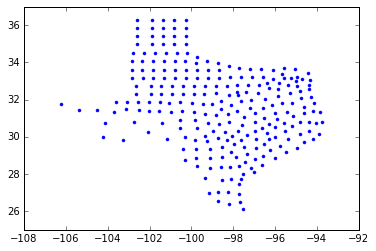

In [61]:
plt.plot(centroids[:,0], centroids[:,1],'.')
plt.ylim([25,37])

In [62]:
wq = ps.queen_from_shapefile('../data/texas.shp')

In [63]:
wq[0]

{4: 1.0, 5: 1.0, 6: 1.0}

(25, 37)

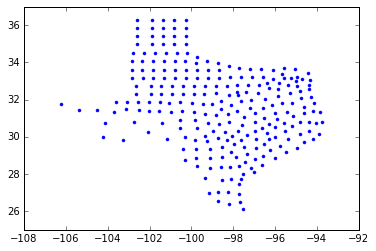

In [64]:
plt.plot(centroids[:,0], centroids[:,1],'.')
plt.ylim([25,37])

In [65]:
wq.neighbors[0]

[4, 5, 6]

In [66]:
s04

NameError: name 's04' is not defined

NameError: name 's04' is not defined

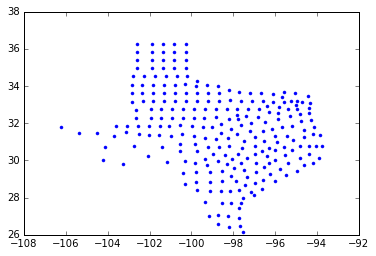

In [67]:
plt.plot(centroids[:,0], centroids[:,1],'.')
plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])

NameError: name 's04' is not defined

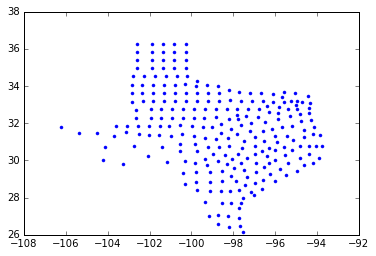

In [68]:

plt.plot(centroids[:,0], centroids[:,1],'.')
plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])

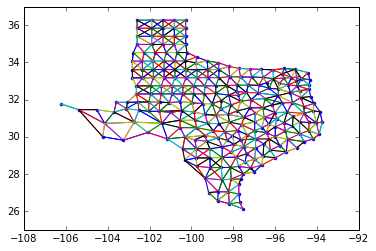

In [69]:
plt.plot(centroids[:,0], centroids[:,1],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])
for k,neighs in wq.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')

In [70]:
wr = ps.rook_from_shapefile('../data/texas.shp')

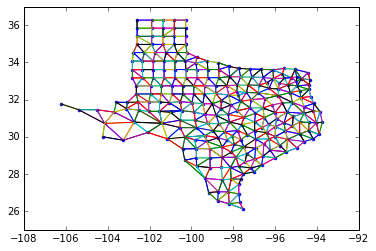

In [71]:
plt.plot(centroids[:,0], centroids[:,1],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])
for k,neighs in wr.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')

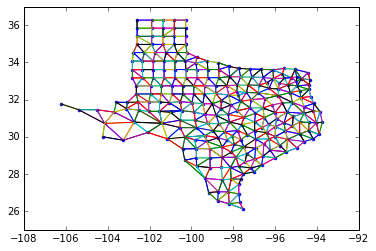

In [72]:
plt.plot(centroids[:,0], centroids[:,1],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])
for k,neighs in wr.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')

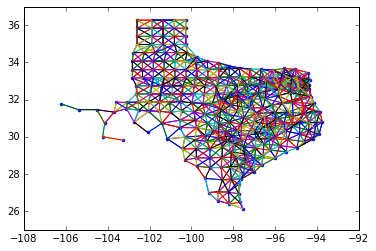

In [73]:
plt.plot(centroids[:,0], centroids[:,1],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
plt.ylim([25,37])
for k,neighs in mind.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')